In [29]:
import pandas as pd
import plotly.io as pio

import requests
import json
import csv
import plotly.graph_objs as go
import numpy as np
import plotly.express as px

states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [30]:
total_per_state = {'AK': 2,
 'AL': 518,
 'AR': 232,
 'AZ': 1013,
 'CA': 828,
 'CO': 754,
 'CT': 6621,
 'DC': 4734,
 'DE': 6087,
 'FL': 2560,
 'GA': 1601,
 'HI': 110,
 'IA': 992,
 'ID': 58,
 'IL': 1376,
 'IN': 2186,
 'KS': 293,
 'KY': 2088,
 'LA': 451,
 'MA': 1266,
 'MD': 4992,
 'ME': 151,
 'MI': 1459,
 'MN': 1052,
 'MO': 707,
 'MS': 174,
 'MT': 81,
 'NC': 2668,
 'ND': 206,
 'NE': 100,
 'NH': 796,
 'NJ': 10557,
 'NM': 503,
 'NV': 0,
 'NY': 1230,
 'OH': 2752,
 'OK': 583,
 'OR': 21,
 'PA': 6063,
 'RI': 2039,
 'SC': 1415,
 'SD': 19,
 'TN': 1714,
 'TX': 313,
 'UT': 449,
 'VA': 2979,
 'VT': 530,
 'WA': 592,
 'WI': 691,
 'WV': 1004,
 'WY': 41}

In [31]:
c = 0
for i in total_per_state:
    c += total_per_state[i]
print(c)

79651


In [32]:
top5_cat_total = {'top1': ['Bombay',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  '',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Tabby',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair',
  'Domestic Short Hair', 
  'Domestic Short Hair'],
 'top2': ['Domestic Short Hair',
  'American Shorthair',
  'Tabby',
  'Tabby',
  'Tabby',
  'Domestic Medium Hair',
  'Tabby',
  'Tabby',
  'Tabby',
  'Tabby',
  'Tabby',
  'Domestic Medium Hair',
  'Tabby',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Tabby',
  'Domestic Medium Hair',
  'Tabby',
  'Tabby',
  'Domestic Long Hair',
  'Tabby',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Tabby',
  'Tabby',
  'Tabby',
  'Domestic Medium Hair',
  'Tabby',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Tabby',
  'Domestic Medium Hair',
  '',
  'Domestic Long Hair',
  'Tabby',
  'Tabby',
  'Domestic Long Hair',
  'Tabby',
  'Domestic Long Hair',
  'American Shorthair',
  'Domestic Short Hair',
  'Tabby',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Tabby',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Tabby', 
  'Domestic Long Hair'],
 'top3': ['',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Tuxedo',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Tabby',
  'Domestic Medium Hair',
  'Tabby',
  'Tabby',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Tuxedo',
  'Domestic Long Hair',
  '',
  'Tiger',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Siamese',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Tabby',
  'Chartreux',
  'Domestic Medium Hair',
  'American Shorthair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Medium Hair', 
  'Domestic Medium Hair'],
 'top4': ['',
  'Tabby',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Siamese',
  'Tabby',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'American Shorthair',
  'Domestic Long Hair',
  'American Shorthair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'American Shorthair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Tabby',
  'Domestic Long Hair',
  'Tuxedo',
  'Tabby',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'American Shorthair',
  'Scottish Fold',
  'Domestic Long Hair',
  'Tabby',
  'Calico',
  'Tuxedo',
  'Domestic Medium Hair',
  'Tabby',
  '',
  'Domestic Medium Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Domestic Medium Hair',
  'Domestic Long Hair',
  'Tabby',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Domestic Long Hair',
  'Tabby',
  'Siamese',
  'Domestic Long Hair',
  'Tabby',
  'Tabby',
  'Tabby',
  'Domestic Long Hair', 
  'Manx'],
 'top5': ['',
  'Siamese',
  'Tuxedo',
  'Tuxedo',
  'Calico',
  'Siamese',
  'Domestic Long Hair',
  'Tuxedo',
  'Tuxedo',
  'Tuxedo',
  'American Shorthair',
  'Tortoiseshell',
  'Tuxedo',
  'Extra-Toes Cat / Hemingway Polydactyl',
  'Tortoiseshell',
  'American Shorthair',
  'Siamese',
  'Tortoiseshell',
  'Calico',
  'Tuxedo',
  'Tuxedo',
  'Bengal',
  'American Shorthair',
  'Tuxedo',
  'Siamese',
  'Domestic Medium Hair',
  'Tabby',
  'Tuxedo',
  'American Shorthair',
  'Dilute Calico',
  'Tabby',
  'Domestic Long Hair',
  'Maine Coon',
  '',
  'Tabby',
  'American Shorthair',
  'Calico',
  'Abyssinian',
  'Tuxedo',
  'Tuxedo',
  'Domestic Medium Hair',
  'Tiger',
  'American Shorthair',
  'Domestic Long Hair',
  'Tabby',
  'Tuxedo',
  'Tiger',
  'American Shorthair',
  'Tiger',
  'Calico',
  'Siamese']}

In [33]:
import csv
with open('each_state_cat.csv', mode = 'w', newline = '') as w:
    writer = csv.DictWriter(w, fieldnames=['state', 'count', 'top1', 'top2', 'top3', 'top4', 'top5'])
    writer.writeheader()
    i = 0
    for key, value in total_per_state.items():
        writer.writerow({'state': key, 'count': value, 'top1': top5_cat_total['top1'][i]
                        , 'top2': top5_cat_total['top2'][i]
                        , 'top3': top5_cat_total['top3'][i]
                        , 'top4': top5_cat_total['top4'][i]
                        , 'top5': top5_cat_total['top5'][i]})
        i += 1

In [34]:
import pandas as pd
import plotly.io as pio

import plotly.graph_objs as go

df = pd.read_csv('each_state_cat.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' + 'Top1: '+ df['top1'] +'<br>' + 'Top2: '+ df['top2'] + '<br>' + 'Top3: '+ df['top3'] + '<br>' + 'Top4: '+ df['top4'] + '<br>' + 'Top5: '+ df['top5'] 
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['state'],
        z = df['count'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Popularity"
        )
    ) ]

layout = dict(
        title = 'Top 5 cats in each state',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
fig.show()

In [35]:
pio.write_html(fig, file='top_cat.html', auto_open=True)


In [36]:
import pandas as pd
import plotly.io as pio
import plotly
import requests
import json
import csv
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from collections import defaultdict

with open('dog_data1-1001.json', 'r') as f:
    data = json.load(f)

state_breed = defaultdict(list)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

with open('dog_data1-1001.json', 'r') as f:
    data = json.load(f)

state_breed = defaultdict(list)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)


with open('dog_data1001-2001.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

with open('dog_data2001-3001.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

with open('dog_data3001-4001.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

with open('dog_data4001-5001.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

with open('dog_data5001-6001.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)


with open('dog_data6001-7001.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

with open('dog_data7001-....json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    breed = data[i]['breeds']['primary']
    state = data[i]['contact']['address']['state']
    state_breed[state].append(breed)

url = "https://api.petfinder.com/v2/types/dog/breeds"
header = {"Authorization": f"Bearer {ACCESS_TOKEN}"}
response = requests.get(url, headers = header)
types=response.json()['breeds']
dog_breeds = [t['name'] for t in types]

all_state_dog = defaultdict(list)
breed_count = defaultdict(list)
for s in states:
    for b in dog_breeds:
        breed_count[b] = state_breed[s].count(b)
    #print(len(breed_count))
    #print(s)
    all_state_dog[s] = sorted(breed_count.items(), key=lambda x:x[1], reverse = True)

total_count_per_state = {}
for state in states:
    total = 0
    for k,v in all_state_dog[state]:
        total += v
    total_count_per_state[state] = total
total_count_per_state


top5_dog_per_states = {}
ranks = ['top1','top2','top3','top4','top5']
for r in ranks:
    top5_dog_per_states[r]=[]
for state in states:
    i=0
    for k,v in all_state_dog[state]:
        top5_dog_per_states[ranks[i]].append(k)
        i+=1
        if i==5: break

with open('each_state_dog.csv', mode = 'w', newline = '') as w:
    writer = csv.DictWriter(w, fieldnames=['state', 'count', 'top1', 'top2', 'top3', 'top4', 'top5'])
    writer.writeheader()
    i = 0
    for key, value in total_count_per_state.items():
        writer.writerow({'state': key, 'count': value, 'top1': top5_dog_per_states['top1'][i]
                        , 'top2': top5_dog_per_states['top2'][i]
                        , 'top3': top5_dog_per_states['top3'][i]
                        , 'top4': top5_dog_per_states['top4'][i]
                        , 'top5': top5_dog_per_states['top5'][i]})
        i += 1

df = pd.read_csv('each_state_dog.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' + '<br>' + 'Top1: '+ df['top1'] +'<br>' + 'Top2: '+ df['top2'] + '<br>' + 'Top3: '+ df['top3'] + '<br>' + 'Top4: '+ df['top4'] + '<br>' + 'Top5: '+ df['top5'] 
data = [ dict(
        type='choropleth',
        colorscale = px.colors.sequential.Blues,
        autocolorscale = False,
        locations = df['state'],
        z = df['count'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Popularity"
        )
    ) ]

layout = dict(
        title = 'Top 5 dogs in each state',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
fig.show()
pio.write_html(fig, file='top_dog.html', auto_open=True)



FileNotFoundError: [Errno 2] No such file or directory: 'dog_data1-1001.json'

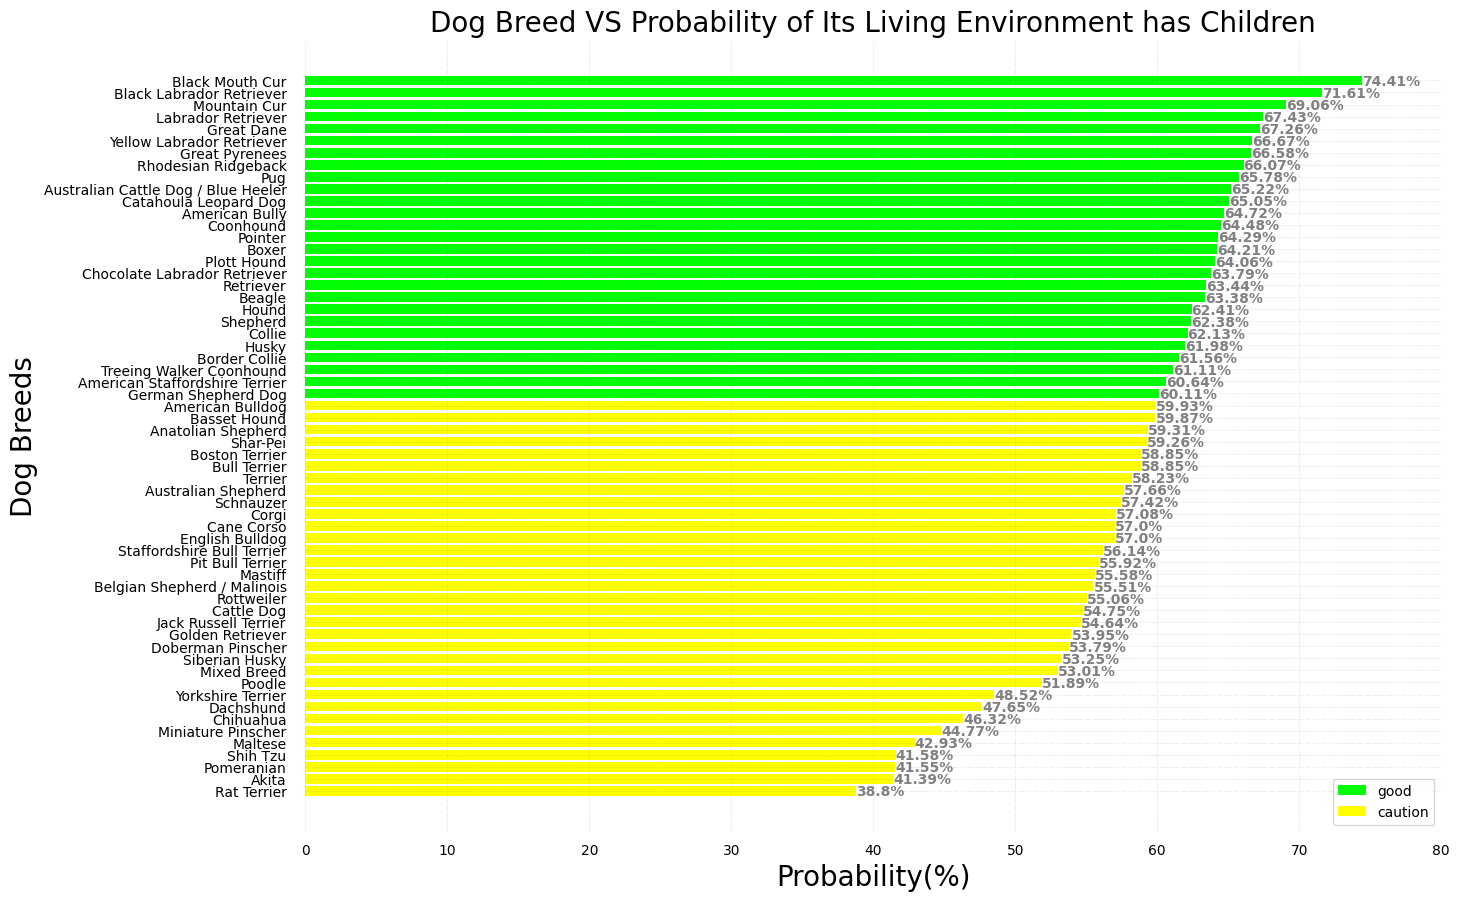

In [48]:

import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
my_data = pd.read_csv('friendly_result/dog_result.csv')

# Figure Size
_, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
# colors = sns.color_palette('pastel')

# children
my_data = my_data.sort_values(by=['children'],ascending=False)
dog_list1 = my_data['breed'].values
# print(my_data['children'][my_data['children'] > 0.45])
condition1 = my_data['children'] > 0.6
condition2 = (my_data['children'] <= 0.6) & (my_data['children'] > 0.3)
condition3 = my_data['children'] <= 0.3
plt.barh(my_data['breed'][condition1], my_data['children'][condition1]*100, color='lime', label='good')
plt.barh(my_data['breed'][condition2], my_data['children'][condition2]*100, color='yellow', label='caution')
# plt.barh(my_data['breed'][condition3], my_data['children'][condition3]*100, color='red', label='bad')
plt.legend(loc='lower right')
plt.title('Dog Breed VS Probability of Its Living Environment has Children',fontsize = 20)
plt.xlabel('Probability(%)',fontsize = 20)
plt.ylabel('Dog Breeds',fontsize = 20)
plt.xlim((0,80))

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 
# Add x, y gridlines
ax.grid(visible= True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.8,
             str(round((i.get_width()), 2)) +'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.subplots_adjust(left=0.24, right=0.95, top=0.95, bottom=0.07)

plt.savefig('./plot/Dogs_Children.png')
plt.show()



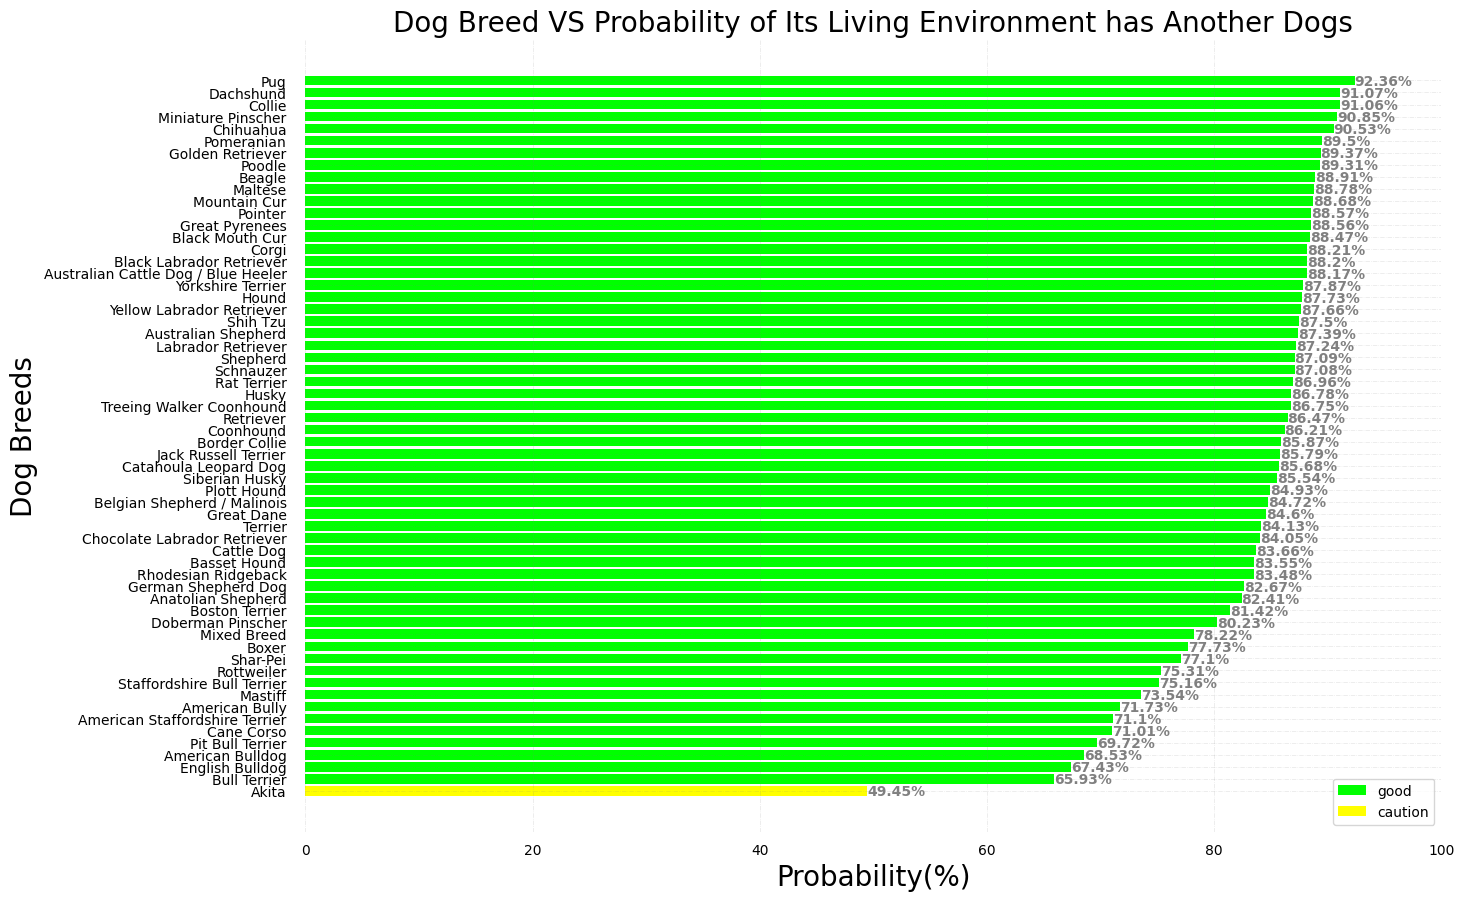

In [49]:

my_data = pd.read_csv('friendly_result/dog_result.csv')

# Figure Size
_, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
# colors = sns.color_palette('pastel')
# dogs
my_data = my_data.sort_values(by=['dogs'],ascending=False)
dog_list2 = my_data['breed'].values
condition1 = my_data['dogs'] > 0.6
condition2 = (my_data['dogs'] <= 0.6) & (my_data['dogs'] > 0.3)
condition3 = my_data['dogs'] <= 0.3
plt.barh(my_data['breed'][condition1], my_data['dogs'][condition1]*100, color='lime', label='good')
plt.barh(my_data['breed'][condition2], my_data['dogs'][condition2]*100, color='yellow', label='caution')
# plt.barh(my_data['breed'][condition3], my_data['dogs'][condition3]*100, color='red', label='bad')
plt.legend(loc='lower right')
plt.title('Dog Breed VS Probability of Its Living Environment has Another Dogs',fontsize = 20)
plt.xlabel('Probability(%)',fontsize = 20)
plt.ylabel('Dog Breeds',fontsize = 20)
plt.xlim((0,100))

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 
# Add x, y gridlines
ax.grid(visible= True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.8,
             str(round((i.get_width()), 2)) +'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.subplots_adjust(left=0.24, right=0.95, top=0.95, bottom=0.07)

plt.savefig('./plot/Dogs_Dogs.png')
plt.show()


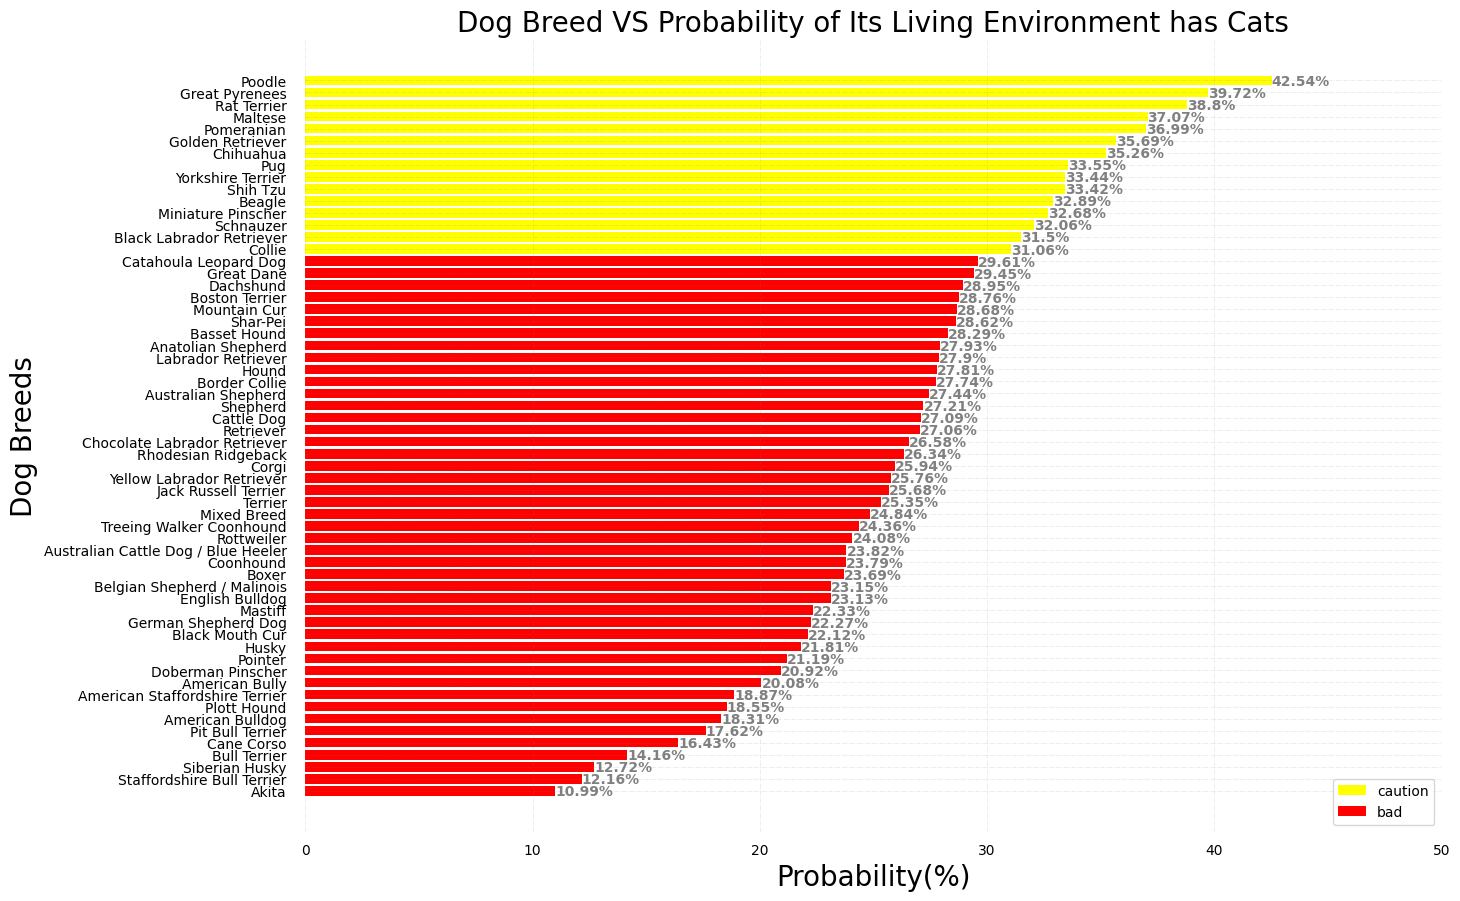

In [50]:


my_data = pd.read_csv('friendly_result/dog_result.csv')

# Figure Size
_, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
# colors = sns.color_palette('pastel')
# dogs
my_data = my_data.sort_values(by=['cats'],ascending=False)
dog_list3 = my_data['breed'].values
condition1 = my_data['cats'] > 0.6
condition2 = (my_data['cats'] <= 0.6) & (my_data['cats'] > 0.3)
condition3 = my_data['cats'] <= 0.3
# plt.barh(my_data['breed'][condition1], my_data['cats'][condition1]*100, color='lime', label='good')
plt.barh(my_data['breed'][condition2], my_data['cats'][condition2]*100, color='yellow', label='caution')
plt.barh(my_data['breed'][condition3], my_data['cats'][condition3]*100, color='red', label='bad')
plt.legend(loc='lower right')
plt.title('Dog Breed VS Probability of Its Living Environment has Cats',fontsize = 20)
plt.xlabel('Probability(%)',fontsize = 20)
plt.ylabel('Dog Breeds',fontsize = 20)
plt.xlim((0,50))

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 
# Add x, y gridlines
ax.grid(visible= True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.8,
             str(round((i.get_width()), 2)) +'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.subplots_adjust(left=0.24, right=0.95, top=0.95, bottom=0.07)

plt.savefig('./plot/Dogs_Cats.png')
plt.show()


In [51]:

# print(len(dog_list1))
# top 20
# print(dog_list1[:20])
# print(dog_list2[:20])
# print(dog_list3[:20])
# print(set(dog_list1[:20]) & set(dog_list2[:20]) & set(dog_list3[:20]))
# last 20
print(dog_list1[40:])
print(dog_list2[40:])
print(dog_list3[40:])
print(set(dog_list1[40:]) & set(dog_list2[40:]) & set(dog_list3[40:]))



['Pit Bull Terrier' 'Mastiff' 'Belgian Shepherd / Malinois' 'Rottweiler'
 'Cattle Dog' 'Jack Russell Terrier' 'Golden Retriever'
 'Doberman Pinscher' 'Siberian Husky' 'Mixed Breed' 'Poodle'
 'Yorkshire Terrier' 'Dachshund' 'Chihuahua' 'Miniature Pinscher'
 'Maltese' 'Shih Tzu' 'Pomeranian' 'Akita' 'Rat Terrier']
['Basset Hound' 'Rhodesian Ridgeback' 'German Shepherd Dog'
 'Anatolian Shepherd' 'Boston Terrier' 'Doberman Pinscher' 'Mixed Breed'
 'Boxer' 'Shar-Pei' 'Rottweiler' 'Staffordshire Bull Terrier' 'Mastiff'
 'American Bully' 'American Staffordshire Terrier' 'Cane Corso'
 'Pit Bull Terrier' 'American Bulldog' 'English Bulldog' 'Bull Terrier'
 'Akita']
['Coonhound' 'Boxer' 'Belgian Shepherd / Malinois' 'English Bulldog'
 'Mastiff' 'German Shepherd Dog' 'Black Mouth Cur' 'Husky' 'Pointer'
 'Doberman Pinscher' 'American Bully' 'American Staffordshire Terrier'
 'Plott Hound' 'American Bulldog' 'Pit Bull Terrier' 'Cane Corso'
 'Bull Terrier' 'Siberian Husky' 'Staffordshire Bull Terrier

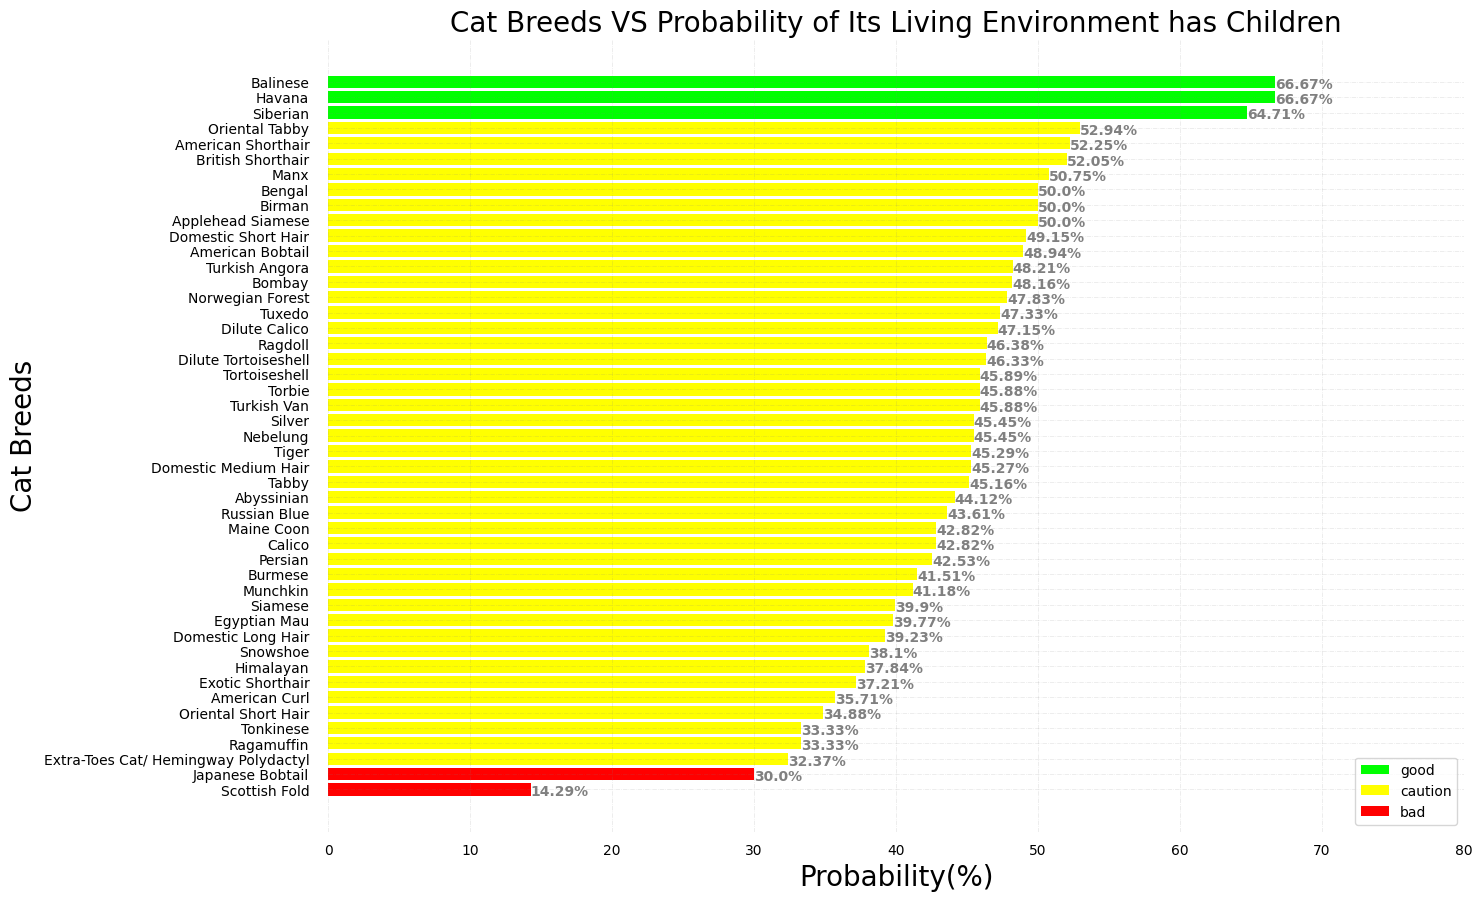

In [52]:


my_data = pd.read_csv('friendly_result/cat_result.csv')

# Figure Size
_, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
# colors = sns.color_palette('pastel')

# children
my_data = my_data.sort_values(by=['children'],ascending=False)
cat_set1 = my_data['breed'].values

condition1 = my_data['children'] > 0.6
condition2 = (my_data['children'] <= 0.6) & (my_data['children'] > 0.3)
condition3 = my_data['children'] <= 0.3
plt.barh(my_data['breed'][condition1], my_data['children'][condition1]*100, color='lime', label='good')
plt.barh(my_data['breed'][condition2], my_data['children'][condition2]*100, color='yellow', label='caution')
plt.barh(my_data['breed'][condition3], my_data['children'][condition3]*100, color='red', label='bad')
plt.legend(loc='lower right')
plt.title('Cat Breeds VS Probability of Its Living Environment has Children',fontsize = 20)
plt.xlabel('Probability(%)',fontsize = 20)
plt.ylabel('Cat Breeds',fontsize = 20)
plt.xlim((0,80))

# dogs
# my_data = my_data.sort_values(by=['dogs'],ascending=False)
# plt.barh(my_data['breed'], my_data['dogs']*100, color=colors)
# plt.title('Cat Breeds VS Living Environment has Dogs')
# plt.xlabel('Percentage(%)')
# plt.ylabel('Cat Breeds')
# plt.xlim((0,60))

# cats
# my_data = my_data.sort_values(by=['cats'],ascending=False)
# plt.barh(my_data['breed'], my_data['cats']*100, color=colors)
# plt.title('Cat Breeds VS Living Environment has Another Cats')
# plt.xlabel('Percentage(%)')
# plt.ylabel('Cat Breeds')
# plt.xlim((0,100))

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 
# Add x, y gridlines
ax.grid(visible= True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.8,
             str(round((i.get_width()), 2)) +'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.subplots_adjust(left=0.24, right=0.95, top=0.95, bottom=0.07)

plt.savefig('./plot/Cats_Children.png')
# plt.savefig('./plot/Cats_Dogs.png')
# plt.savefig('./plot/Cats_Cats.png')
plt.show()



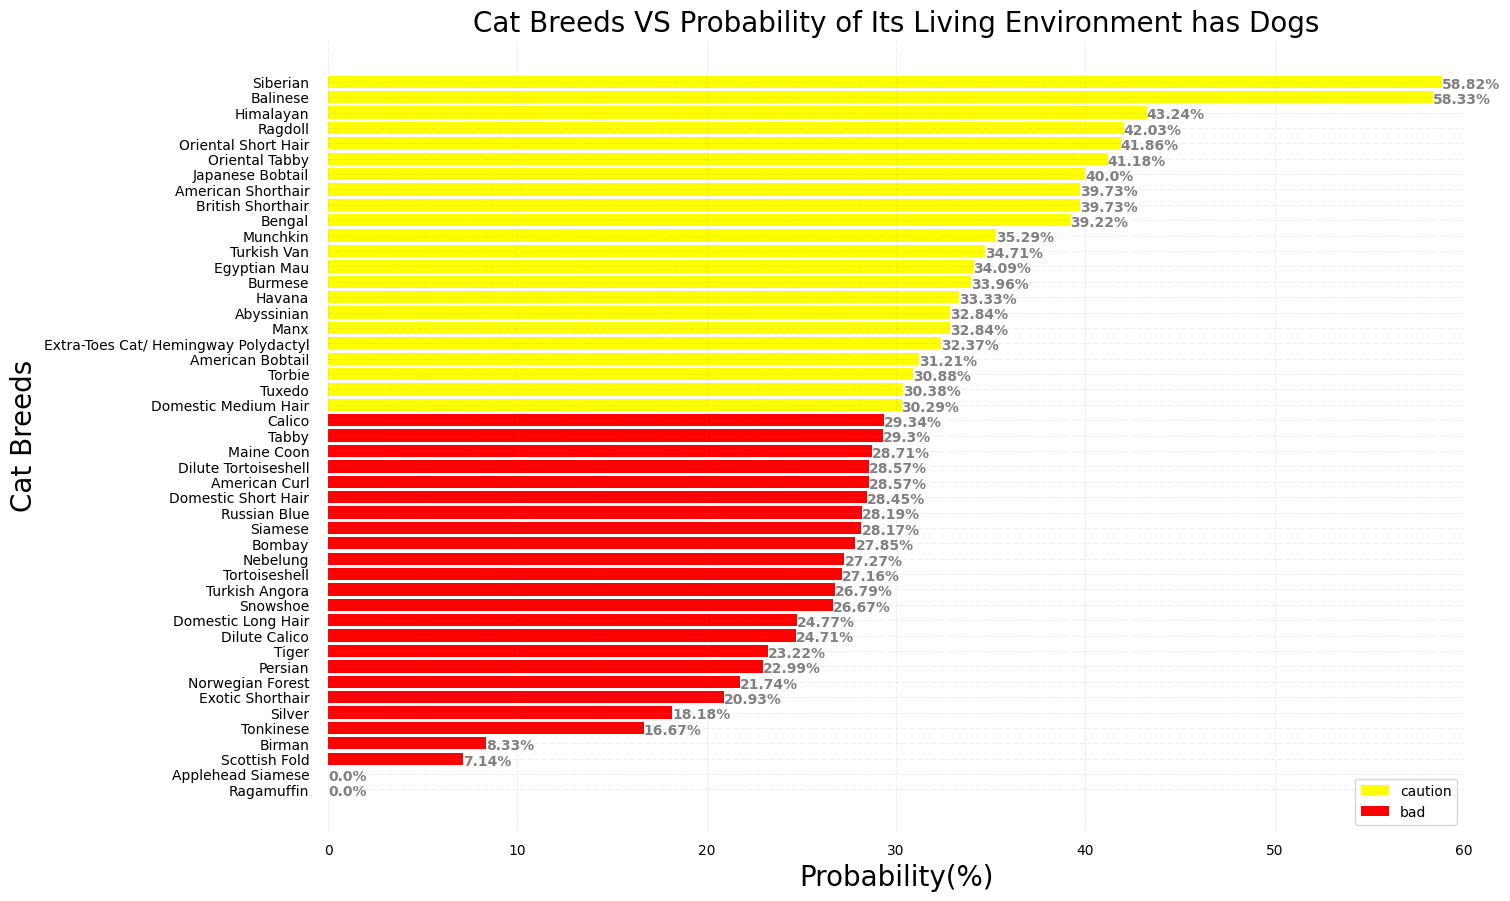

In [53]:



my_data = pd.read_csv('friendly_result/cat_result.csv')

# Figure Size
_, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
# colors = sns.color_palette('pastel')

# children
# my_data = my_data.sort_values(by=['children'],ascending=False)
# plt.barh(my_data['breed'], my_data['children']*100, color=colors)
# plt.title('Cat Breeds VS Living Environment has Children')
# plt.xlabel('Percentage(%)')
# plt.ylabel('Cat Breeds')
# plt.xlim((0,80))

# dogs
my_data = my_data.sort_values(by=['dogs'],ascending=False)
cat_set2 = my_data['breed'].values
condition1 = my_data['dogs'] > 0.6
condition2 = (my_data['dogs'] <= 0.6) & (my_data['dogs'] > 0.3)
condition3 = my_data['dogs'] <= 0.3
# plt.barh(my_data['breed'][condition1], my_data['dogs'][condition1]*100, color='lime', label='good')
plt.barh(my_data['breed'][condition2], my_data['dogs'][condition2]*100, color='yellow', label='caution')
plt.barh(my_data['breed'][condition3], my_data['dogs'][condition3]*100, color='red', label='bad')
plt.legend(loc='lower right')
plt.title('Cat Breeds VS Probability of Its Living Environment has Dogs',fontsize = 20)
plt.xlabel('Probability(%)',fontsize = 20)
plt.ylabel('Cat Breeds',fontsize = 20)
plt.xlim((0,60))

# cats
# my_data = my_data.sort_values(by=['cats'],ascending=False)
# plt.barh(my_data['breed'], my_data['cats']*100, color=colors)
# plt.title('Cat Breeds VS Living Environment has Another Cats')
# plt.xlabel('Percentage(%)')
# plt.ylabel('Cat Breeds')
# plt.xlim((0,100))

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 
# Add x, y gridlines
ax.grid(visible= True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.8,
             str(round((i.get_width()), 2)) +'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.subplots_adjust(left=0.24, right=0.95, top=0.95, bottom=0.07)

# plt.savefig('./plot/Cats_Children.png')
plt.savefig('./plot/Cats_Dogs.png')
# plt.savefig('./plot/Cats_Cats.png')
plt.show()


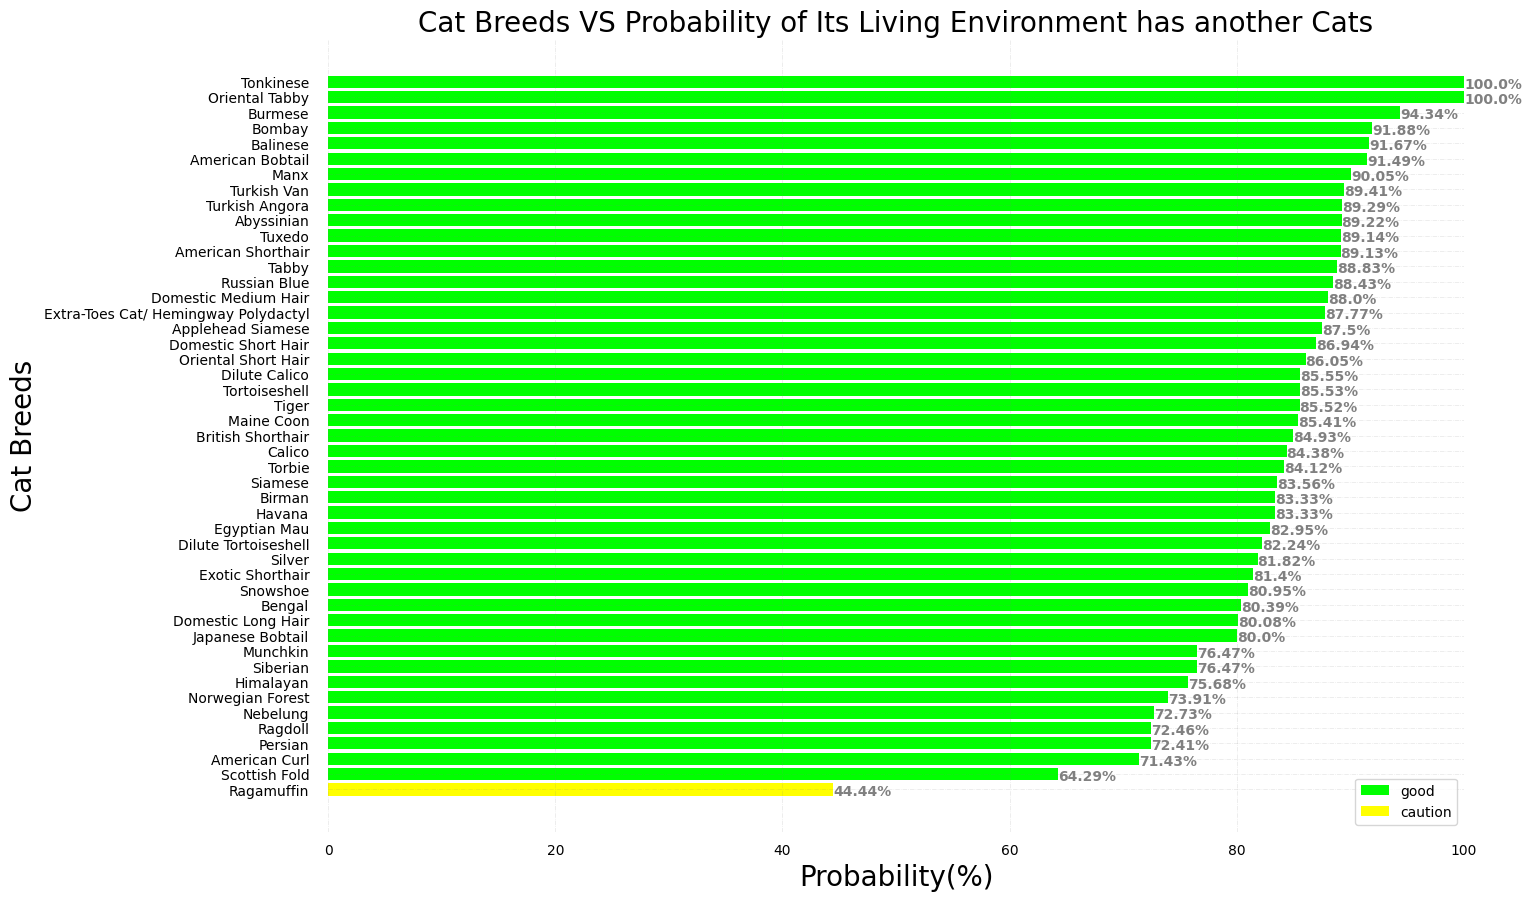

In [54]:


my_data = pd.read_csv('friendly_result/cat_result.csv')

# Figure Size
_, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
# colors = sns.color_palette('pastel')

# children
# my_data = my_data.sort_values(by=['children'],ascending=False)
# plt.barh(my_data['breed'], my_data['children']*100, color=colors)
# plt.title('Cat Breeds VS Living Environment has Children')
# plt.xlabel('Percentage(%)')
# plt.ylabel('Cat Breeds')
# plt.xlim((0,80))

# dogs
# my_data = my_data.sort_values(by=['dogs'],ascending=False)
# plt.barh(my_data['breed'], my_data['dogs']*100, color=colors)
# plt.title('Cat Breeds VS Living Environment has Dogs')
# plt.xlabel('Percentage(%)')
# plt.ylabel('Cat Breeds')
# plt.xlim((0,60))

# cats
my_data = my_data.sort_values(by=['cats'],ascending=False)
cat_set3 = my_data['breed'].values
condition1 = my_data['cats'] > 0.6
condition2 = (my_data['cats'] <= 0.6) & (my_data['cats'] > 0.3)
condition3 = my_data['cats'] <= 0.3
plt.barh(my_data['breed'][condition1], my_data['cats'][condition1]*100, color='lime', label='good')
plt.barh(my_data['breed'][condition2], my_data['cats'][condition2]*100, color='yellow', label='caution')
# plt.barh(my_data['breed'][condition3], my_data['cats'][condition3]*100, color='red', label='bad')
plt.legend(loc='lower right')
plt.title('Cat Breeds VS Probability of Its Living Environment has another Cats',fontsize = 20)
plt.xlabel('Probability(%)',fontsize = 20)
plt.ylabel('Cat Breeds',fontsize = 20)
plt.xlim((0,100))

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 
# Add x, y gridlines
ax.grid(visible= True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.8,
             str(round((i.get_width()), 2)) +'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.subplots_adjust(left=0.24, right=0.95, top=0.95, bottom=0.07)

# plt.savefig('./plot/Cats_Children.png')
# plt.savefig('./plot/Cats_Dogs.png')
plt.savefig('./plot/Cats_Cats.png')
plt.show()


In [55]:


# print(list(cat_set1))
# print(list(cat_set2))
# print(list(cat_set3))
# print(cat_set1 & cat_set2 & cat_set3)
print(len(cat_set1))
# top 20
# print(cat_set1[:20])
# print(cat_set1[:20])
# print(cat_set1[:20])
# print(set(cat_set1[:20]) & set(cat_set2[:20]) & set(cat_set3[:20]))
# last 20
print(cat_set1[40:])
print(cat_set2[40:])
print(cat_set3[40:])
print(set(cat_set1[40:]) & set(cat_set2[40:]) & set(cat_set3[40:]))

47
['American Curl' 'Oriental Short Hair' 'Tonkinese' 'Ragamuffin'
 'Extra-Toes Cat/ Hemingway Polydactyl' 'Japanese Bobtail' 'Scottish Fold']
['Exotic Shorthair' 'Silver' 'Tonkinese' 'Birman' 'Scottish Fold'
 'Applehead Siamese' 'Ragamuffin']
['Norwegian Forest' 'Nebelung' 'Ragdoll' 'Persian' 'American Curl'
 'Scottish Fold' 'Ragamuffin']
{'Scottish Fold', 'Ragamuffin'}
